In [1]:
print('avi')

avi


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
data=pd.read_excel("C:/Users/ELCOT/Downloads/data_prac/cust_data.xlsx")

## Exploratory Data Analysis (EDA)


### 1. Data Exploration and Quality Assessment

In [4]:
data.shape

(30000, 38)

In [5]:
data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [7]:
for i in data.columns:
    print(i,":",len(data[i].unique()))

Cust_ID : 30000
Gender : 3
Orders : 13
Jordan : 16
Gatorade : 13
Samsung : 20
Asus : 17
Udis : 13
Mondelez International : 13
Wrangler : 10
Vans : 16
Fila : 15
Brooks : 10
H&M : 16
Dairy Queen : 24
Fendi : 14
Hewlett Packard : 10
Pladis : 11
Asics : 25
Siemens : 11
J.M. Smucker : 27
Pop Chips : 17
Juniper : 29
Huawei : 16
Compaq : 19
IBM : 9
Burberry : 21
Mi : 9
LG : 13
Dior : 12
Scabal : 11
Tommy Hilfiger : 9
Hollister : 10
Forever 21 : 9
Colavita : 15
Microsoft : 13
Jiffy mix : 9
Kraft : 12


In [8]:
data.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [9]:
data.duplicated().sum()

np.int64(0)

### 2.Data Cleaning


In [10]:
# Treating null vaules

data.isnull().mean()*100



Cust_ID                   0.00
Gender                    9.08
Orders                    0.00
Jordan                    0.00
Gatorade                  0.00
Samsung                   0.00
Asus                      0.00
Udis                      0.00
Mondelez International    0.00
Wrangler                  0.00
Vans                      0.00
Fila                      0.00
Brooks                    0.00
H&M                       0.00
Dairy Queen               0.00
Fendi                     0.00
Hewlett Packard           0.00
Pladis                    0.00
Asics                     0.00
Siemens                   0.00
J.M. Smucker              0.00
Pop Chips                 0.00
Juniper                   0.00
Huawei                    0.00
Compaq                    0.00
IBM                       0.00
Burberry                  0.00
Mi                        0.00
LG                        0.00
Dior                      0.00
Scabal                    0.00
Tommy Hilfiger            0.00
Holliste

In [11]:


data.dropna(subset=['Gender']).reset_index(drop=True)



,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,F,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27271,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27272,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27273,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27274,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
import os
file_name ='e-comm_clean_data1'
file_path = os.path.join('C:/Users/ELCOT/Downloads/data_prac',file_name)
data.to_csv(file_path, index=False)

### 3.Data Visualization

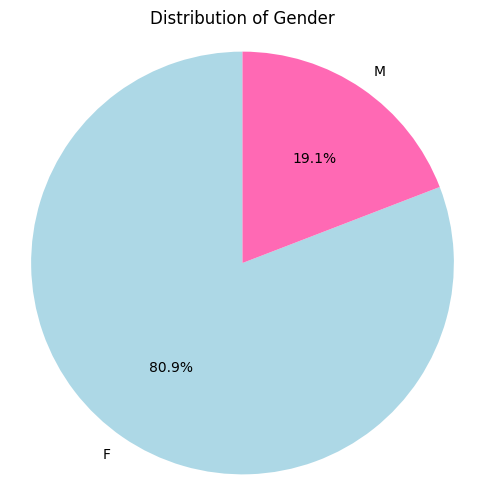

In [13]:
import matplotlib.pyplot as plt

# Count the occurrences of each gender
gender_counts = data['Gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ADD8E6', '#FF69B4', '#808080'])

# Add title and axis labels
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()


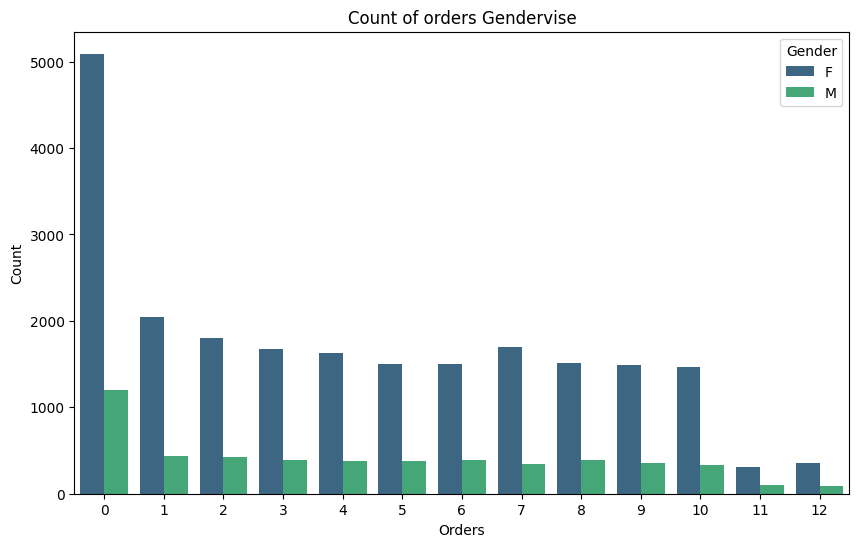

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='Orders',hue='Gender',palette='viridis')
plt.title('Count of orders Gendervise')
plt.xlabel('Orders')
plt.ylabel('Count')
plt.show()

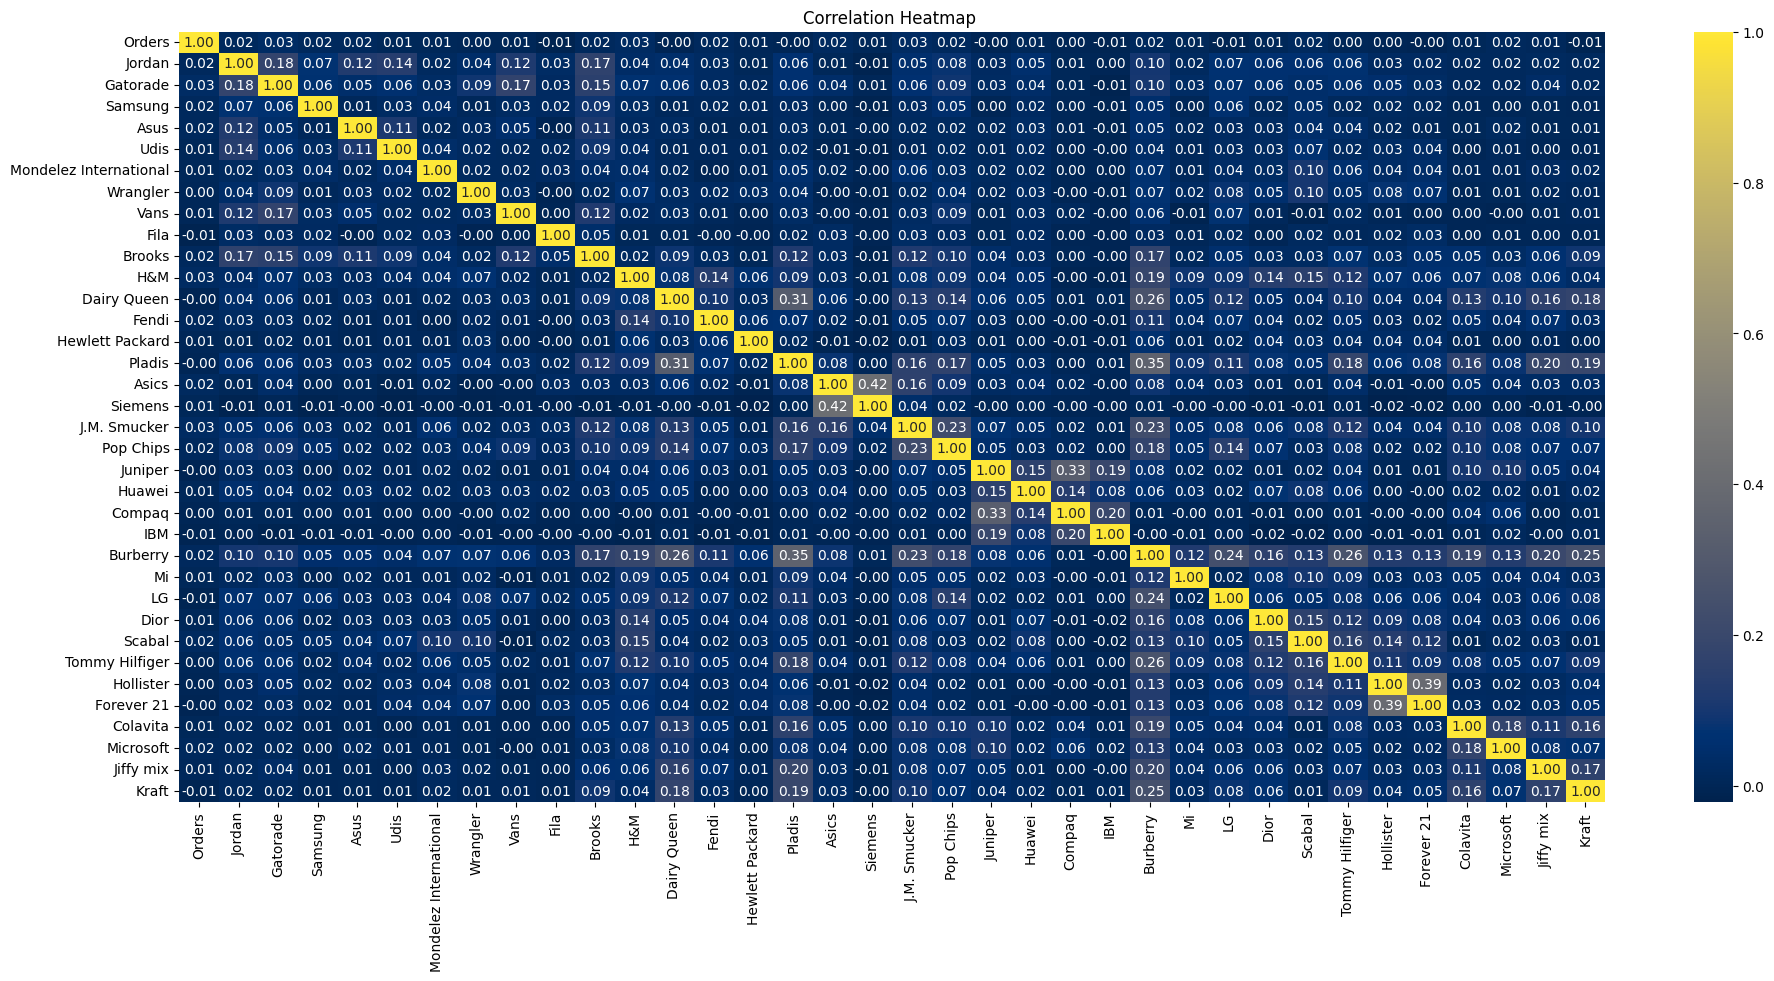

In [15]:
plt.figure(figsize=(23,10))
sns.heatmap(data.drop(columns=['Cust_ID','Gender']).corr(),annot=True,cmap='cividis',fmt='.2f')
plt.title('Correlation Heatmap ')
plt.show()


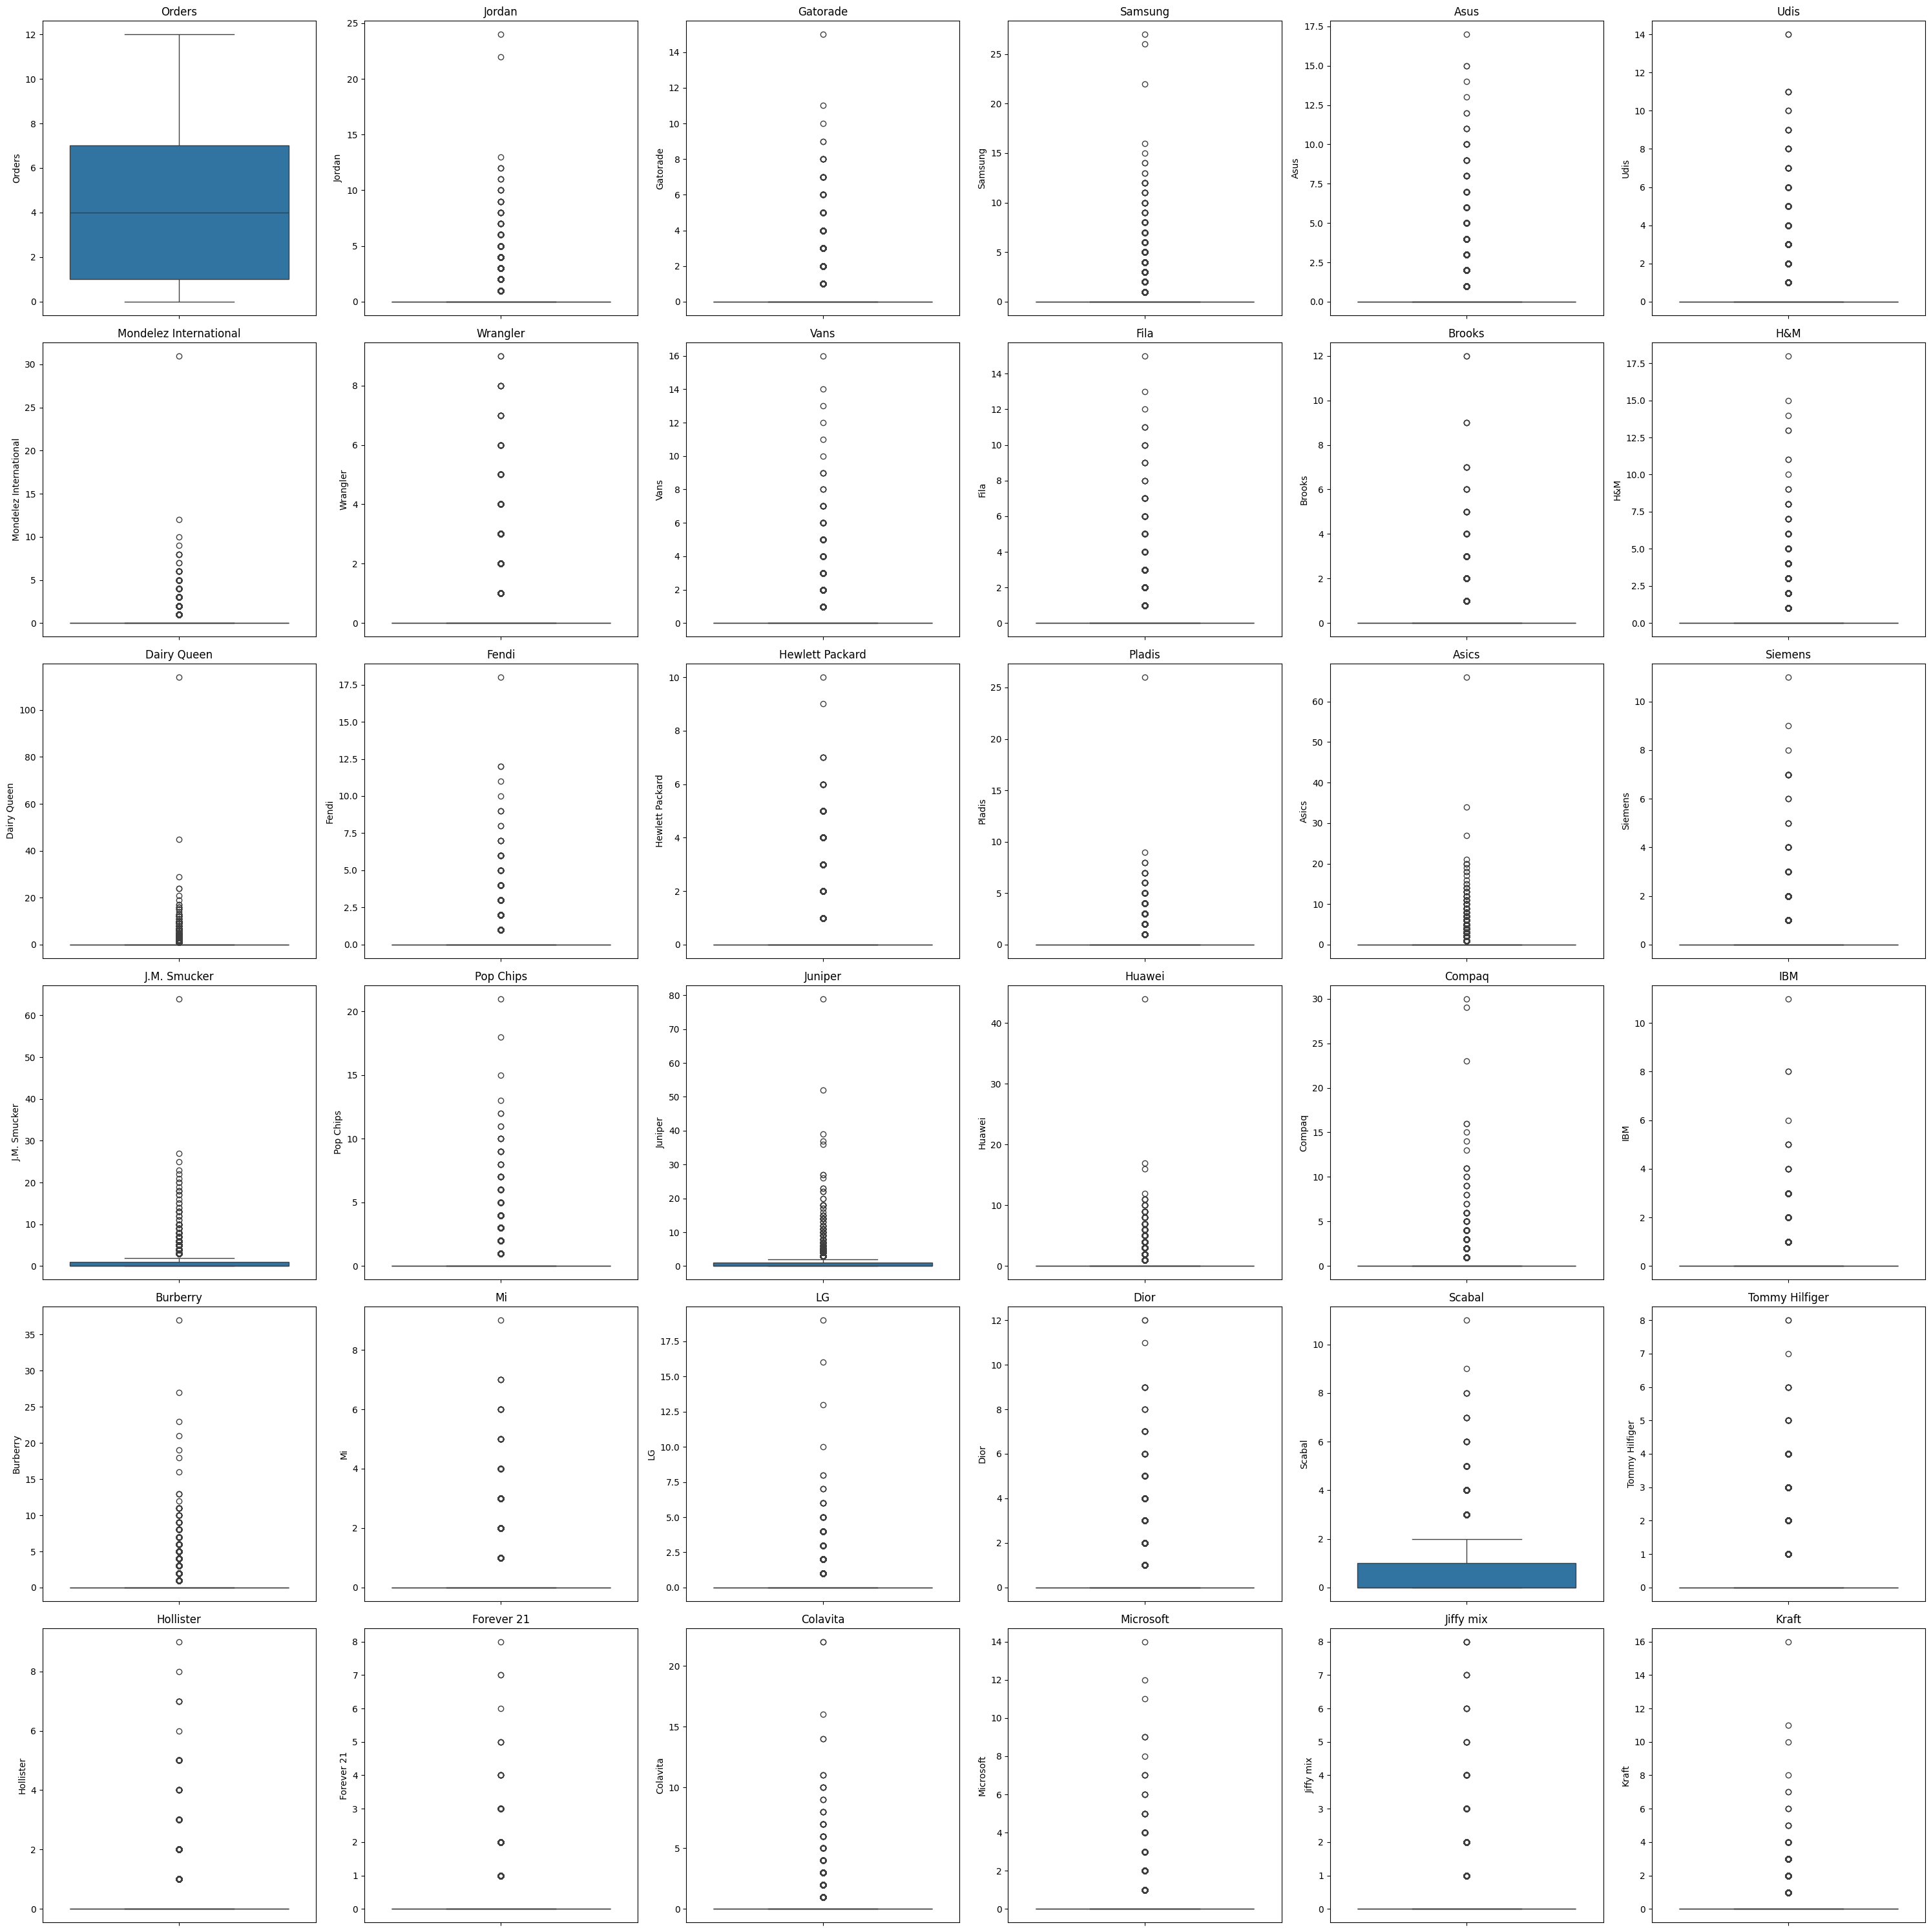

In [16]:

numerical_columns = data.drop(columns=['Cust_ID', 'Gender']).columns


plt.figure(figsize=(30, 30))


for i, col in enumerate(numerical_columns):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

### 4.Data Preprocessing

In [17]:
# Encoding the categorical variables

data = pd.get_dummies(data,columns=['Gender'], drop_first=True)
data = data.astype(int)


In [18]:
data.columns

Index(['Cust_ID', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft',
       'Gender_M'],
      dtype='object')

In [20]:
# Standardicing Data:

scaler=StandardScaler()
data_numerical = data.drop(columns=['Cust_ID','Gender_M']).columns
data[data_numerical] = scaler.fit_transform(data[data_numerical])


In [32]:
data.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_M,Gender_Unknown
0,1,0.788301,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,...,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,1,0
1,2,-1.161423,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,...,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,0,0
2,3,0.788301,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,...,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775,1,0
3,4,-1.161423,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,...,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,0,0
4,5,1.623898,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,...,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151,0,1


In [21]:
Data = data.copy()

In [23]:
# save the cleaned data
import os
file_name ='e-comm_encoded_data1'
file_path = os.path.join('C:/Users/ELCOT/Downloads/data_prac',file_name)
Data.to_csv(file_path, index=False)

In [24]:
scaled_features=pd.read_csv('C:/Users/ELCOT/Downloads/data_prac/e-comm_encoded_data1')
print(scaled_features.head())

clean_data=pd.read_csv("C:/Users/ELCOT/Downloads/data_prac/e-comm_clean_data1")

   Cust_ID    Orders    Jordan  Gatorade   Samsung     Asus      Udis  \
0        1  0.788301 -0.332312 -0.357739 -0.242985 -0.21801 -0.223835   
1        2 -1.161423 -0.332312  1.059984 -0.242985 -0.21801 -0.223835   
2        3  0.788301 -0.332312  1.059984 -0.242985 -0.21801 -0.223835   
3        4 -1.161423 -0.332312 -0.357739 -0.242985 -0.21801 -0.223835   
4        5  1.623898 -0.332312 -0.357739 -0.242985 -0.21801 -0.223835   

   Mondelez International  Wrangler      Vans  ...      Dior    Scabal  \
0               -0.265801  -0.20727  3.446412  ... -0.379382 -0.487923   
1               -0.265801  -0.20727 -0.203353  ...  1.019864 -0.487923   
2               -0.265801  -0.20727 -0.203353  ... -0.379382 -0.487923   
3               -0.265801  -0.20727 -0.203353  ... -0.379382 -0.487923   
4               -0.265801  -0.20727 -0.203353  ... -0.379382  2.149024   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0       -0.311382  -0.202593   -0.191062

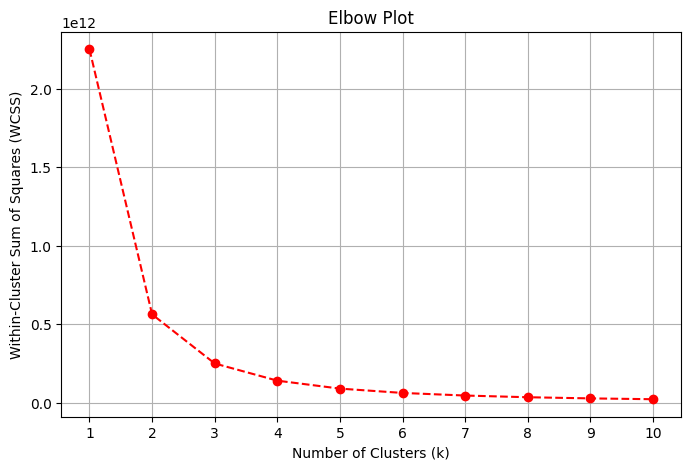

In [25]:
wcss = []


for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='r')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


In [26]:
from sklearn.cluster import KMeans


k = 3  


kmeans = KMeans(n_clusters=k, random_state=10)
clusters = kmeans.fit_predict(scaled_features)

clean_data['Cluster'] = clusters
print(clean_data.head())


   Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1      M       7       0         0        0     0     0   
1        2      F       0       0         1        0     0     0   
2        3      M       7       0         1        0     0     0   
3        4      F       0       0         0        0     0     0   
4        5    NaN      10       0         0        0     0     0   

   Mondelez International  Wrangler  ...  Dior  Scabal  Tommy Hilfiger  \
0                       0         0  ...     0       0               0   
1                       0         0  ...     1       0               0   
2                       0         0  ...     0       0               0   
3                       0         0  ...     0       0               0   
4                       0         0  ...     0       2               0   

   Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  Cluster  
0          0           0         0          0          0      0        

<Axes: xlabel='Cluster', ylabel='Orders'>

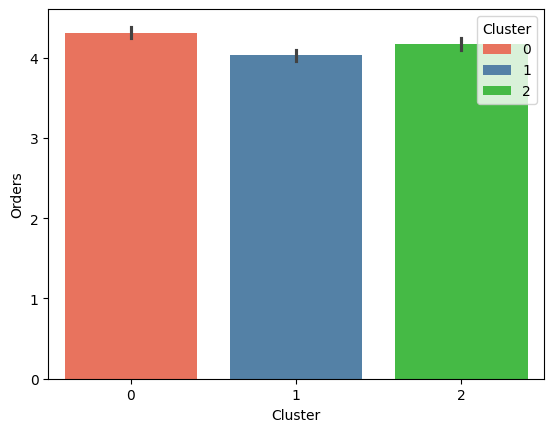

In [27]:
custom_palette = sns.color_palette(["#FF6347", "#4682B4", "#32CD32"])  # Custom colors
sns.barplot(x='Cluster', y='Orders', data=clean_data, hue='Cluster', palette=custom_palette)



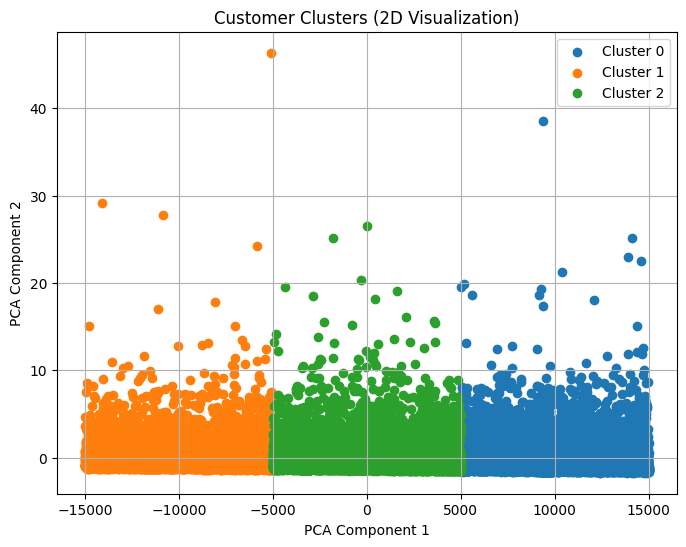

In [28]:

# Reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(
        reduced_features[clusters == cluster, 0],
        reduced_features[clusters == cluster, 1],
        label=f'Cluster {cluster}'
    )

plt.title('Customer Clusters (2D Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()



In [29]:
centroids = kmeans.cluster_centers_
print(centroids)


[[ 2.49965000e+04  3.94264703e-02  8.46188320e-02  1.99240466e-02
   7.16482273e-02  5.23044377e-02  7.50308726e-02  2.98745077e-02
   4.33469787e-02  2.20224370e-02 -1.96276658e-02  4.95169677e-02
   2.12021564e-02 -6.26360375e-03  5.57379045e-02  1.91160546e-02
   9.70198399e-03 -2.65482480e-03 -3.65902584e-02  4.58863779e-03
   5.28537154e-02 -1.76735218e-02  2.84981637e-02 -7.71937125e-04
  -3.05734005e-02  6.31280714e-02 -5.15912677e-02  4.66036391e-02
   7.51490694e-02  5.30093837e-02  2.03672003e-02  1.07308717e-01
   7.13272764e-02  2.87662379e-03  1.88003420e-03 -2.60361033e-02
   4.69922309e-02  1.49480416e-01]
 [ 5.00000000e+03 -3.79908437e-02 -6.87308071e-02 -2.62419772e-02
  -6.29080585e-02 -6.05677270e-02 -6.72490754e-02 -5.50662972e-02
  -4.67619464e-02  3.42712533e-03 -3.03976172e-02 -4.73646180e-02
  -3.35172074e-02  1.27050468e-02 -4.82899100e-02 -1.21012180e-01
  -1.43079872e-02 -6.70515188e-03  4.49870167e-02 -1.34106708e-02
  -5.02404980e-02  2.17040979e-02 -1.2348

In [30]:
pca_loadings = pd.DataFrame(
    pca.components_,
    columns=scaled_features.columns,
    index=[f'PCA Component {i+1}' for i in range(pca.n_components_)]
)
print(pca_loadings.T)


                        PCA Component 1  PCA Component 2
Cust_ID                    1.000000e+00        -0.000016
Orders                     3.363900e-06         0.024028
Jordan                     7.422063e-06         0.139810
Gatorade                   2.519721e-06         0.150538
Samsung                    6.605576e-06         0.066707
Asus                       5.680138e-06         0.077112
Udis                       7.006399e-06         0.072039
Mondelez International     4.106092e-06         0.087460
Wrangler                   4.970153e-06         0.097843
Vans                       2.491926e-07         0.087489
Fila                      -5.193710e-08         0.040971
Brooks                     4.569647e-06         0.184390
H&M                        2.705043e-06         0.198567
Dairy Queen               -6.679569e-07         0.266684
Fendi                      5.086788e-06         0.125094
Hewlett Packard            5.552159e-06         0.055820
Pladis                     1.47